### Import Libraries

In [2443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Load Data

In [2444]:
mydata = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv")

### Data Exploration

In [2445]:
mydata.shape   #(rows,columns)

(1000, 17)

In [2446]:
mydata.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [2447]:
mydata.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [2448]:
mydata.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
384,unknown,30,poor,business,4272,100 - 500 DM,1 - 4 years,2,2,26,none,own,2,unskilled,1,no,no
580,1 - 200 DM,18,critical,car,1056,< 100 DM,> 7 years,3,3,30,bank,own,2,skilled,1,no,yes
545,< 0 DM,24,poor,car,1333,< 100 DM,unemployed,4,2,43,none,other,2,skilled,2,no,yes
827,unknown,18,perfect,business,4165,< 100 DM,1 - 4 years,2,2,36,store,own,2,skilled,2,no,yes
512,> 200 DM,15,good,business,2687,< 100 DM,4 - 7 years,2,4,26,none,rent,1,skilled,1,yes,no
549,unknown,48,critical,car,8858,unknown,4 - 7 years,2,1,35,none,other,2,skilled,1,yes,no
220,1 - 200 DM,12,good,furniture/appliances,625,< 100 DM,< 1 year,4,1,26,bank,own,1,unskilled,1,no,no
420,unknown,15,good,car,3186,> 1000 DM,4 - 7 years,2,3,20,none,rent,1,skilled,1,no,no
502,> 200 DM,9,good,furniture/appliances,1126,100 - 500 DM,> 7 years,2,4,49,none,own,1,skilled,1,no,no
718,> 200 DM,24,critical,furniture/appliances,3148,unknown,1 - 4 years,3,2,31,none,own,2,skilled,1,yes,no


In [2449]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [2450]:
mydata.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [2451]:
mydata.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [2452]:
df=mydata.copy()

In [2453]:
mydata.describe(include='all')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,596,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [2454]:
mydata.describe(include='object')    #only object type 

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,6,5,5,3,3,4,2,2
top,unknown,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,no
freq,394,530,473,603,339,814,713,630,596,700


In [2455]:
duplicate = mydata.duplicated()
print(duplicate.sum())

0


In [2456]:
mydata['employment_duration']=mydata['employment_duration'].replace(to_replace='> 7 years',value='8')
mydata['employment_duration']=mydata['employment_duration'].replace(np.nan,8)

mydata['employment_duration']=mydata['employment_duration'].replace(to_replace='1 - 4 years',value='2.5')
mydata['employment_duration']=mydata['employment_duration'].replace(np.nan,2.5)

mydata['employment_duration']=mydata['employment_duration'].replace(to_replace='4 - 7 years',value='5.5')
mydata['employment_duration']=mydata['employment_duration'].replace(np.nan,5.5)

mydata['employment_duration']=mydata['employment_duration'].replace(to_replace='< 1 year',value='0.5')
mydata['employment_duration']=mydata['employment_duration'].replace(np.nan,0.5)

mydata['employment_duration']=mydata['employment_duration'].replace(to_replace='unemployed',value='0')
mydata['employment_duration']=mydata['employment_duration'].replace(np.nan,0)

mydata['employment_duration']=mydata['employment_duration'].astype(float)

In [2457]:
unknown_m=(50*603+350*103+63*750+1250)/817
unknown_m

140.39167686658507

In [2458]:
mydata['savings_balance']=mydata['savings_balance'].replace(to_replace='< 100 DM',value='50')
mydata['savings_balance']=mydata['savings_balance'].replace(np.nan,50)

mydata['savings_balance']=mydata['savings_balance'].replace(to_replace='100 - 500 DM',value='350')
mydata['savings_balance']=mydata['savings_balance'].replace(np.nan,350)

mydata['savings_balance']=mydata['savings_balance'].replace(to_replace='500 - 1000 DM',value='750')
mydata['savings_balance']=mydata['savings_balance'].replace(np.nan,750)

mydata['savings_balance']=mydata['savings_balance'].replace(to_replace='> 1000 DM',value='1250')
mydata['savings_balance']=mydata['savings_balance'].replace(np.nan,1250)

mydata['savings_balance']=mydata['savings_balance'].replace(to_replace='unknown',value=unknown_m)
mydata['savings_balance']=mydata['savings_balance'].replace(np.nan,unknown_m)  
mydata['savings_balance']=mydata['savings_balance'].astype(float)

In [2459]:
mydata['default']=mydata['default'].replace(to_replace='yes',value='1')
mydata['default']=mydata['default'].replace(np.nan,1)

mydata['default']=mydata['default'].replace(to_replace='no',value='0')
mydata['default']=mydata['default'].replace(np.nan,0)
mydata['default']=mydata['default'].astype(float)

In [2460]:
mydata.describe(include='all')

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000.000000
unique,4,NaN,5,6,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,4,NaN,2,NaN
top,unknown,NaN,good,furniture/appliances,NaN,NaN,NaN,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,NaN
freq,394,NaN,530,473,NaN,NaN,NaN,NaN,NaN,NaN,814,713,NaN,630,NaN,596,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,199.141677,3.914500,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,0.300000
std,NaN,12.058814,NaN,NaN,2822.736876,297.658514,2.881361,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,50.000000,0.000000,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,50.000000,2.500000,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,50.000000,2.500000,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,140.391677,8.000000,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,1.000000


In [2461]:
mydata.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,140.391677,8.0,4,4,67,none,own,2,skilled,1,yes,0.0
1,1 - 200 DM,48,good,furniture/appliances,5951,50.000000,2.5,2,2,22,none,own,1,skilled,1,no,1.0
2,unknown,12,critical,education,2096,50.000000,5.5,2,3,49,none,own,1,unskilled,2,no,0.0
3,< 0 DM,42,good,furniture/appliances,7882,50.000000,5.5,2,4,45,none,other,1,skilled,2,no,0.0
4,< 0 DM,24,poor,car,4870,50.000000,2.5,3,4,53,none,other,2,skilled,2,no,1.0


In [2462]:
mydata.default.value_counts()  #Target Variable

0.0    700
1.0    300
Name: default, dtype: int64

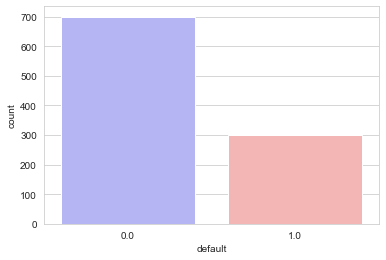

In [2463]:
sns.countplot(x='default',data=mydata,palette='bwr')
plt.show()

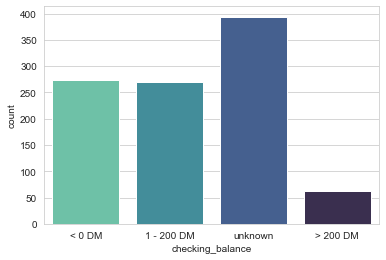

In [2464]:
sns.countplot(x="checking_balance",data=mydata,palette='mako_r')
plt.show()

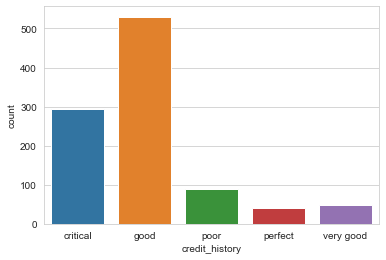

In [2465]:
sns.countplot(x="credit_history",data=mydata)
plt.show()

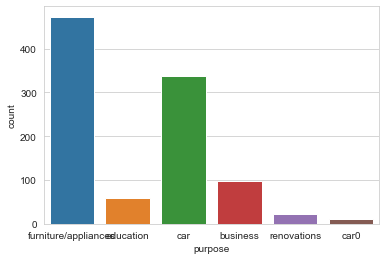

In [2466]:
sns.countplot(x="purpose",data=mydata)
plt.show()

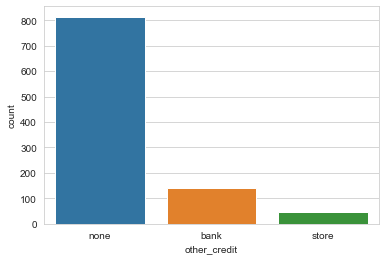

In [2467]:
sns.countplot(x="other_credit",data=mydata)
plt.show()

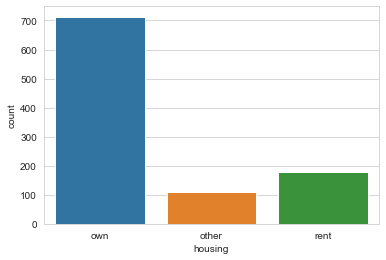

In [2468]:
sns.countplot(x="housing",data=mydata)
plt.show()

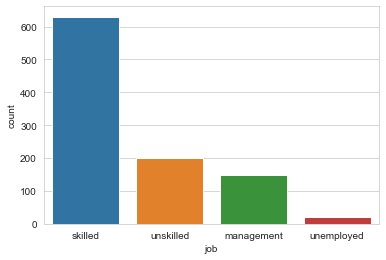

In [2469]:
sns.countplot(x="job",data=mydata)
plt.show()

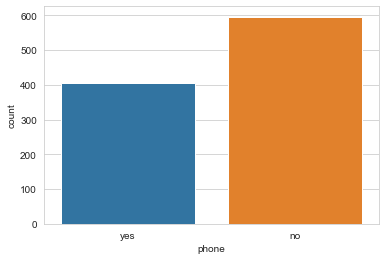

In [2470]:
sns.countplot(x="phone",data=mydata)
plt.show()

In [2471]:
mydata.groupby('default').mean()    # 0 for no and 1 for true

,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents
default,,,,,,,,,
0.0,19.207143,2985.457143,223.070205,4.132857,2.920000,2.842857,36.224286,1.424286,1.155714
1.0,24.860000,3938.126667,143.308446,3.405000,3.096667,2.850000,33.963333,1.366667,1.153333


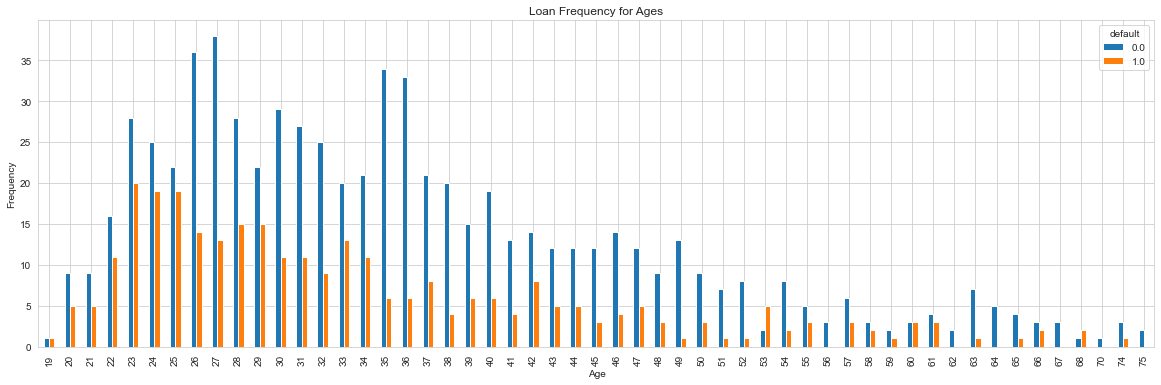

In [2472]:
pd.crosstab(mydata.age,mydata.default).plot(kind="bar",figsize=(20,6))
plt.title('Loan Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Loanfrequencyages.png')
plt.show()

<AxesSubplot:xlabel='housing', ylabel='count'>

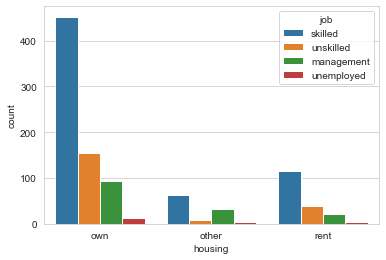

In [2473]:
sns.countplot(x="housing",hue="job",data=mydata)

<AxesSubplot:xlabel='other_credit', ylabel='count'>

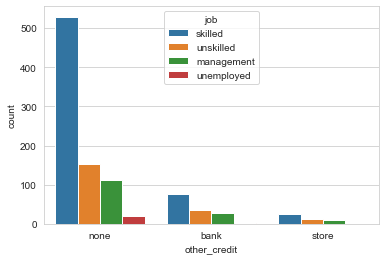

In [2474]:
sns.countplot(x='other_credit',hue="job",data=mydata)

<AxesSubplot:xlabel='credit_history', ylabel='count'>

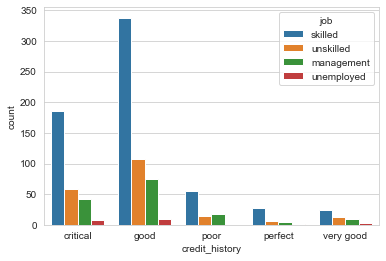

In [2475]:
sns.countplot(x='credit_history',hue="job",data=mydata)

<AxesSubplot:xlabel='job', ylabel='count'>

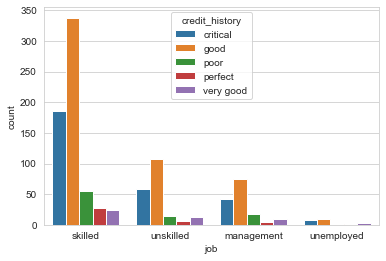

In [2476]:
sns.countplot(hue='credit_history',x="job",data=mydata)

array([[<AxesSubplot:title={'center':'months_loan_duration'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'savings_balance'}>],
       [<AxesSubplot:title={'center':'employment_duration'}>,
        <AxesSubplot:title={'center':'percent_of_income'}>,
        <AxesSubplot:title={'center':'years_at_residence'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'existing_loans_count'}>,
        <AxesSubplot:title={'center':'dependents'}>],
       [<AxesSubplot:title={'center':'default'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

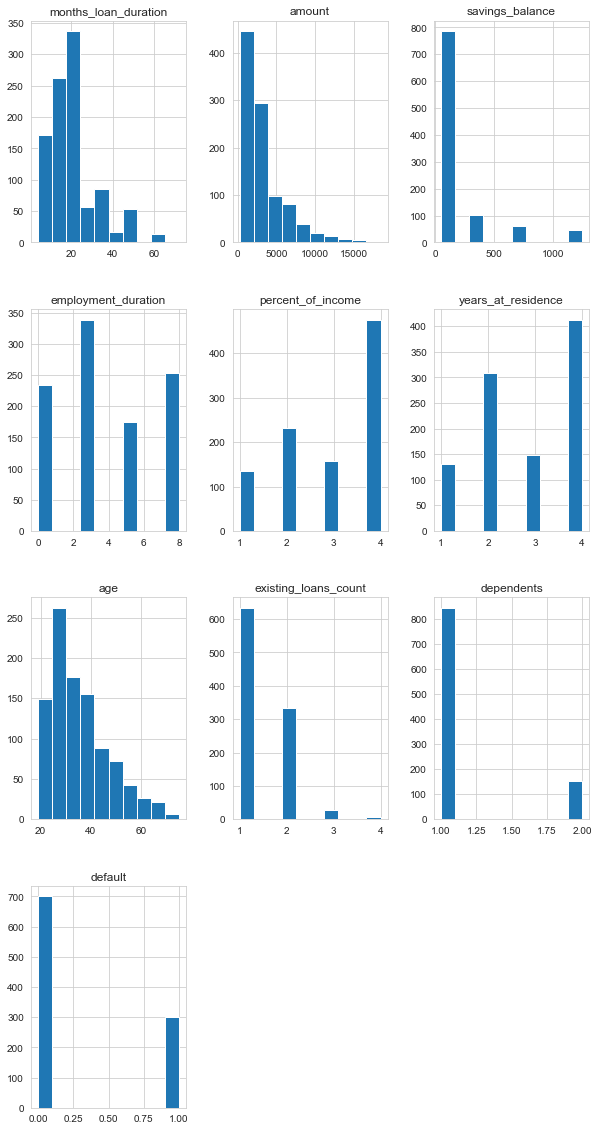

In [2477]:
mydata.hist(figsize=(10,20))

<AxesSubplot:xlabel='job', ylabel='percent_of_income'>

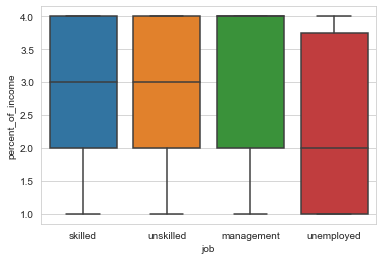

In [2478]:
sns.boxplot(x="job",y="percent_of_income",data=mydata)

<AxesSubplot:xlabel='job', ylabel='years_at_residence'>

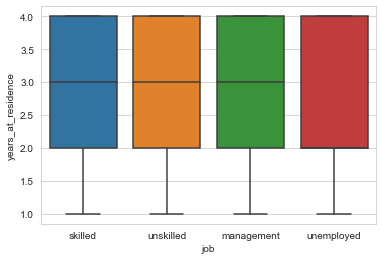

In [2479]:
sns.boxplot(x="job",y="years_at_residence",data=mydata)

In [2480]:
pd.crosstab(mydata['job'],mydata['housing']) 

housing,other,own,rent
job,,,
management,33,94,21
skilled,63,452,115
unemployed,4,13,5
unskilled,8,154,38


In [2481]:
pd.crosstab(mydata['job'],mydata['other_credit'])

other_credit,bank,none,store
job,,,
management,27,112,9
skilled,75,529,26
unemployed,3,19,0
unskilled,34,154,12


In [2482]:
pd.crosstab(mydata['job'],mydata['phone'])

phone,no,yes
job,,
management,21,127
skilled,390,240
unemployed,16,6
unskilled,169,31


In [2483]:
pd.crosstab(mydata['job'],mydata['default'])

default,0.0,1.0
job,,
management,97,51
skilled,444,186
unemployed,15,7
unskilled,144,56


In [2484]:
pd.crosstab(mydata['job'],mydata['credit_history'])

credit_history,critical,good,perfect,poor,very good
job,,,,,
management,42,74,5,18,9
skilled,185,338,28,55,24
unemployed,8,10,1,0,3
unskilled,58,108,6,15,13


In [2485]:
pd.pivot_table(mydata,'amount',index=['job','credit_history'],columns=['default'])

default                             0.0          1.0
job        credit_history                           
management critical         5025.303030  6048.777778
           good             3791.820000  8030.000000
           perfect         12204.000000  7508.000000
           poor             6577.700000  3550.125000
           very good        7797.333333  7010.333333
skilled    critical         2716.432258  3596.200000
           good             2598.182609  3338.722222
           perfect          4599.545455  5528.294118
           poor             4111.052632  4268.941176
           very good        3173.100000  3036.571429
unemployed critical         1851.714286  1190.000000
           good             2984.714286  5926.000000
           perfect                  NaN  1778.000000
           very good        3990.000000   901.000000
unskilled  critical         2087.583333  4123.200000
           good             2260.297297  1920.588235
           perfect          3757.333333  4121.666667
           poor             4073.500000  2259.000000
           very good        1483.000000  1338.166667

In [2486]:
pd.pivot_table(mydata,'amount',index=['credit_history','job'],columns=['default'])

default                             0.0          1.0
credit_history job                                  
critical       management   5025.303030  6048.777778
               skilled      2716.432258  3596.200000
               unemployed   1851.714286  1190.000000
               unskilled    2087.583333  4123.200000
good           management   3791.820000  8030.000000
               skilled      2598.182609  3338.722222
               unemployed   2984.714286  5926.000000
               unskilled    2260.297297  1920.588235
perfect        management  12204.000000  7508.000000
               skilled      4599.545455  5528.294118
               unemployed           NaN  1778.000000
               unskilled    3757.333333  4121.666667
poor           management   6577.700000  3550.125000
               skilled      4111.052632  4268.941176
               unskilled    4073.500000  2259.000000
very good      management   7797.333333  7010.333333
               skilled      3173.100000  3036.571429
               unemployed   3990.000000   901.000000
               unskilled    1483.000000  1338.166667

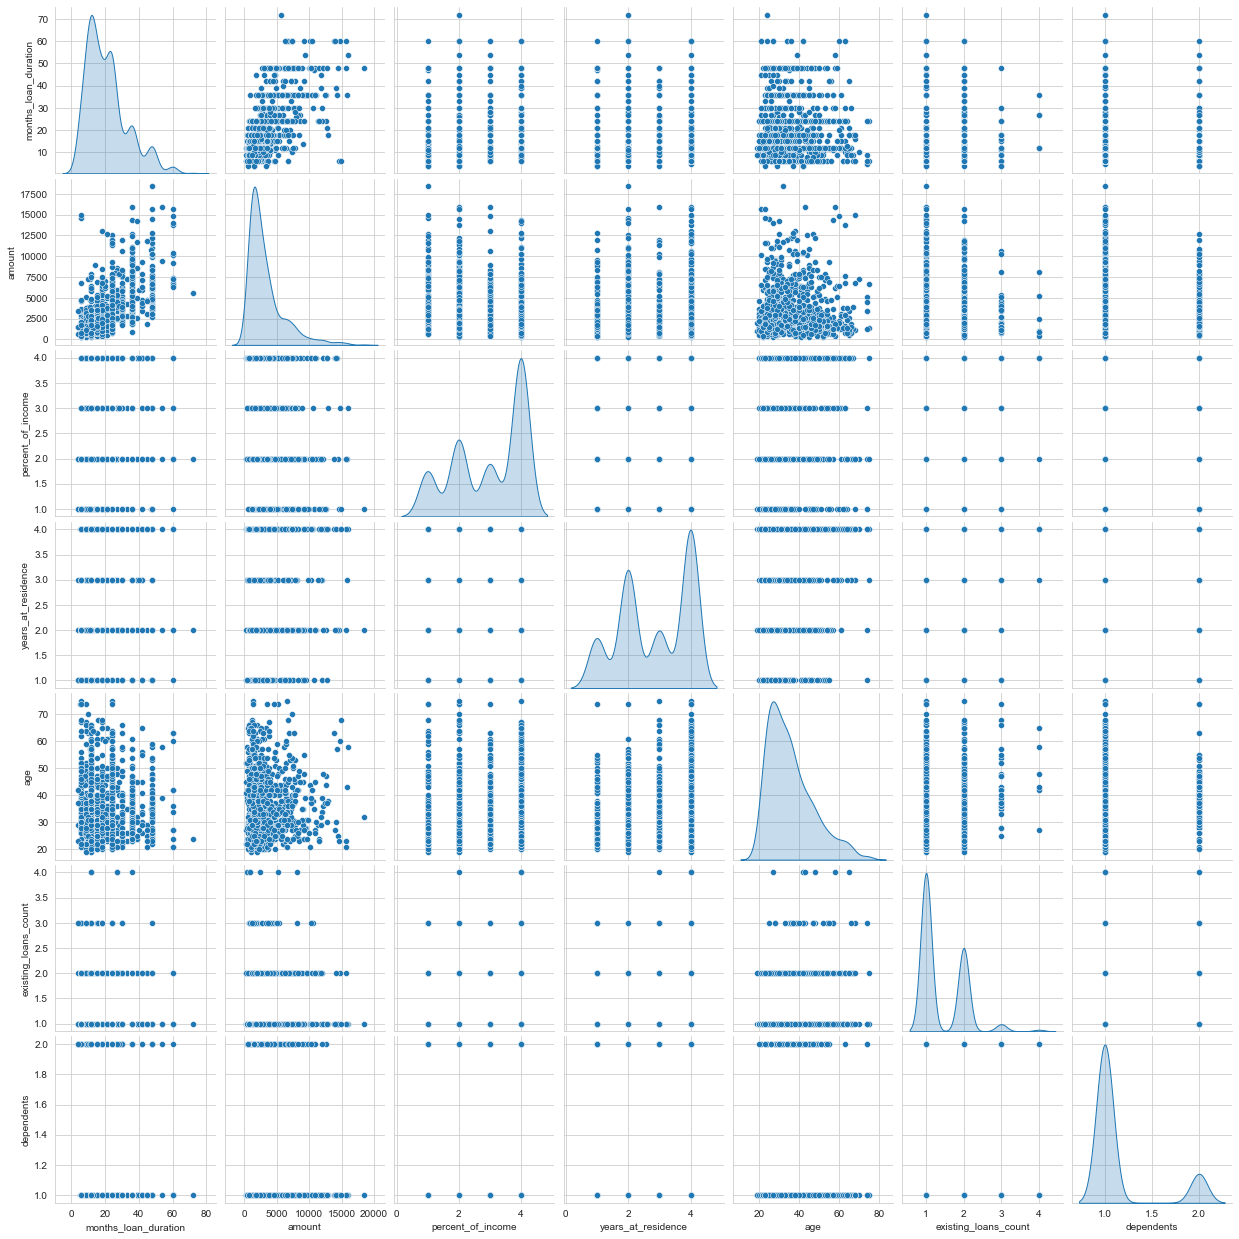

In [2487]:
sns.pairplot(df,diag_kind="kde")

<AxesSubplot:>

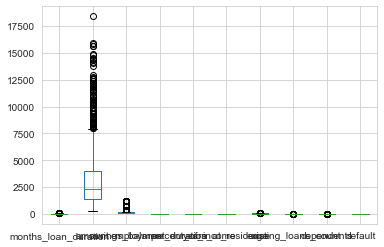

In [2488]:
mydata.boxplot()

<function matplotlib.pyplot.show(close=None, block=None)>

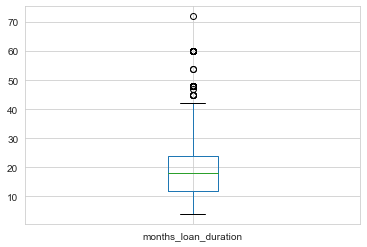

In [2489]:
mydata.boxplot(column=['months_loan_duration'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

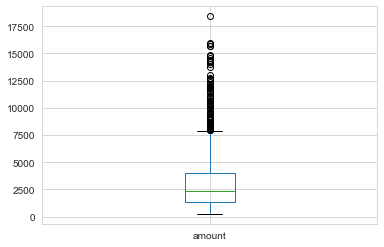

In [2490]:
mydata.boxplot(column=['amount'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

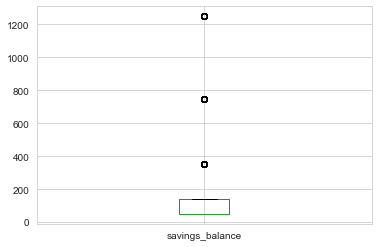

In [2491]:
mydata.boxplot(column=['savings_balance'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

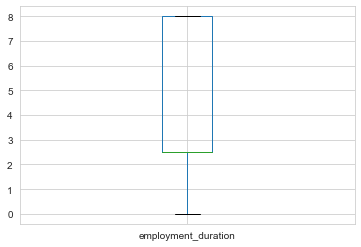

In [2492]:
mydata.boxplot(column=['employment_duration'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

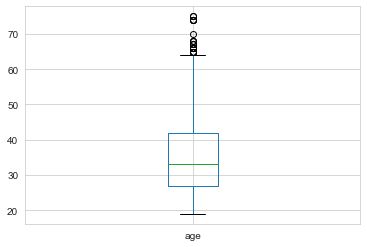

In [2493]:
mydata.boxplot(column=['age'])
plt.show

### Remove Outliers

In [2494]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [2495]:
low_months_loan_duration,upp_months_loan_duration=remove_outlier(mydata['months_loan_duration'])
mydata['months_loan_duration']=np.where(mydata["months_loan_duration"]>upp_months_loan_duration,upp_months_loan_duration,mydata['months_loan_duration'])
mydata['months_loan_duration']=np.where(mydata["months_loan_duration"]<low_months_loan_duration,low_months_loan_duration,mydata['months_loan_duration'])

low_amount,upp_amount=remove_outlier(mydata['amount'])
mydata['amount']=np.where(mydata["amount"]>upp_amount,upp_amount,mydata['amount'])
mydata['amount']=np.where(mydata["amount"]<low_amount,low_amount,mydata['amount'])

low_savings_balance,upp_savings_balance=remove_outlier(mydata['savings_balance'])
mydata['savings_balance']=np.where(mydata["savings_balance"]>upp_savings_balance,upp_savings_balance,mydata['savings_balance'])
mydata['savings_balance']=np.where(mydata["savings_balance"]<low_savings_balance,low_savings_balance,mydata['savings_balance'])

low_age,upp_age=remove_outlier(mydata['age'])
mydata['age']=np.where(mydata["age"]>upp_age,upp_age,mydata['age'])
mydata['age']=np.where(mydata["age"]<low_age,low_age,mydata['age'])

 

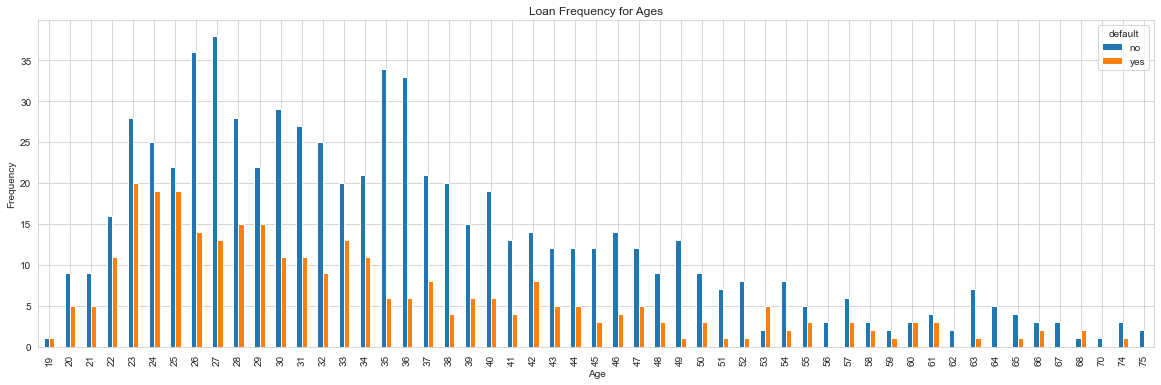

In [2496]:
pd.crosstab(df.age,df.default).plot(kind="bar",figsize=(20,6))
plt.title('Loan Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Loanfrequencyages.png')
plt.show()                            #before Remove outliers

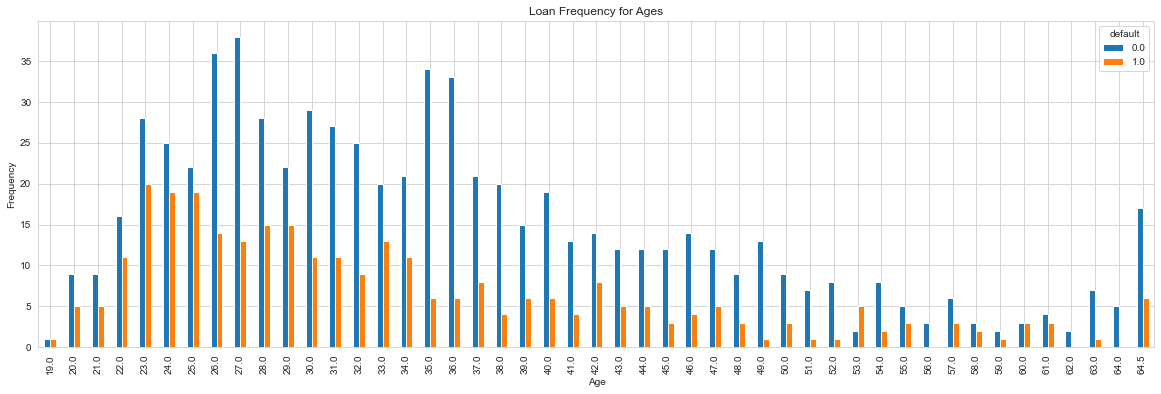

In [2497]:
pd.crosstab(mydata.age,mydata.default).plot(kind="bar",figsize=(20,6))
plt.title('Loan Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Loanfrequencyages.png')
plt.show()                             #after remove outliers

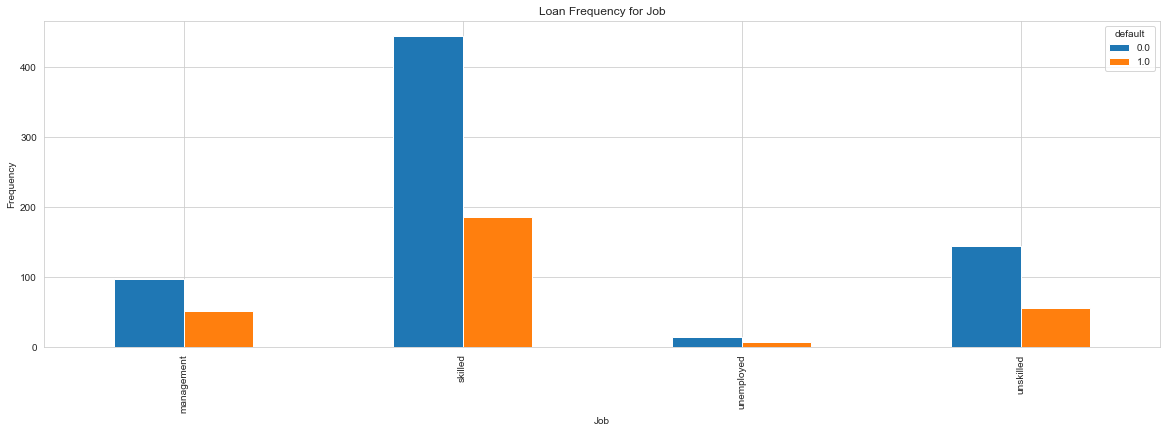

In [2498]:
pd.crosstab(mydata.job,mydata.default).plot(kind="bar",figsize=(20,6))
plt.title('Loan Frequency for Job')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.savefig('JObfrequencyages.png')
plt.show()

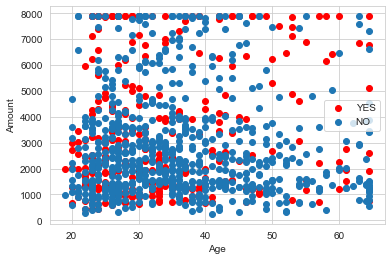

In [2499]:
plt.scatter(x=mydata.age[mydata.default==1], y=mydata.amount[(mydata.default==1)], c="red")
plt.scatter(x=mydata.age[mydata.default==0], y=mydata.amount[(mydata.default==0)])
plt.legend(["YES", "NO"])
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

### Scaling

In [2500]:
from sklearn.preprocessing import StandardScaler
std_scale =StandardScaler()
std_scale

StandardScaler()

In [2501]:
std_scale.fit_transform(X_train)
std_scale.transform(X_test)

array([[-0.50441828,  1.7557248 ,  1.7788653 , ..., -0.4888129 ,
        -1.23944822,  1.23944822],
       [ 1.4792491 ,  2.22873322, -0.72255236, ..., -0.4888129 ,
         0.80681063, -0.80681063],
       [-0.78779933, -0.11866913, -0.72255236, ..., -0.4888129 ,
         0.80681063, -0.80681063],
       ...,
       [-0.50441828, -0.67855898,  0.27801471, ..., -0.4888129 ,
        -1.23944822,  1.23944822],
       [ 0.34572489,  0.3390477 ,  1.7788653 , ..., -0.4888129 ,
         0.80681063, -0.80681063],
       [-1.07118038, -0.86228715,  1.7788653 , ..., -0.4888129 ,
         0.80681063, -0.80681063]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='amount'>

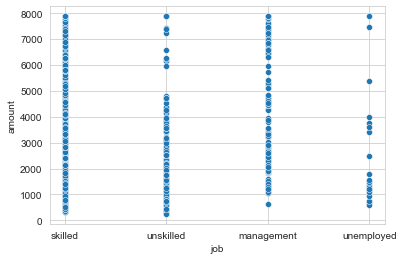

In [2502]:
sns.scatterplot(mydata['job'],mydata['amount'],data=mydata)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='savings_balance'>

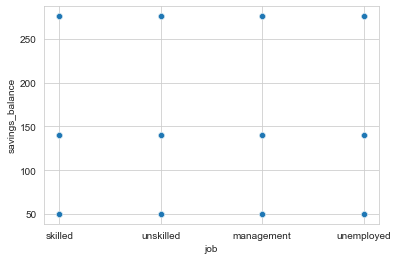

In [2503]:
sns.scatterplot(mydata['job'],mydata['savings_balance'],data=mydata)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_history', ylabel='amount'>

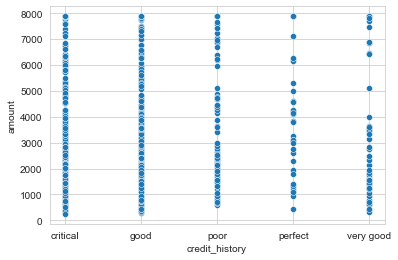

In [2504]:
sns.scatterplot(mydata['credit_history'],mydata['amount'],data=mydata)

In [2505]:
corr=mydata.corr()
corr

,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default
months_loan_duration,1.000000,0.641783,0.009832,0.061536,0.092999,0.033969,-0.039504,0.001314,-0.028019,0.213059
amount,0.641783,1.000000,-0.016889,0.010194,-0.291218,0.031144,0.025524,0.038982,0.036128,0.128539
savings_balance,0.009832,-0.016889,1.000000,0.081012,-0.000102,0.063107,0.012413,-0.032353,0.004713,-0.121681
employment_duration,0.061536,0.010194,0.081012,1.000000,0.129710,0.274548,0.309493,0.140007,0.097627,-0.115818
percent_of_income,0.092999,-0.291218,-0.000102,0.129710,1.000000,0.049302,0.064109,0.021669,-0.071207,0.072404
years_at_residence,0.033969,0.031144,0.063107,0.274548,0.049302,1.000000,0.269418,0.089625,0.042643,0.002967
age,-0.039504,0.025524,0.012413,0.309493,0.064109,0.269418,1.000000,0.150475,0.119905,-0.091812
existing_loans_count,0.001314,0.038982,-0.032353,0.140007,0.021669,0.089625,0.150475,1.000000,0.109667,-0.045732
dependents,-0.028019,0.036128,0.004713,0.097627,-0.071207,0.042643,0.119905,0.109667,1.000000,-0.003015
default,0.213059,0.128539,-0.121681,-0.115818,0.072404,0.002967,-0.091812,-0.045732,-0.003015,1.000000


In [2506]:
corr=mydata.corr()
corr

,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default
months_loan_duration,1.000000,0.641783,0.009832,0.061536,0.092999,0.033969,-0.039504,0.001314,-0.028019,0.213059
amount,0.641783,1.000000,-0.016889,0.010194,-0.291218,0.031144,0.025524,0.038982,0.036128,0.128539
savings_balance,0.009832,-0.016889,1.000000,0.081012,-0.000102,0.063107,0.012413,-0.032353,0.004713,-0.121681
employment_duration,0.061536,0.010194,0.081012,1.000000,0.129710,0.274548,0.309493,0.140007,0.097627,-0.115818
percent_of_income,0.092999,-0.291218,-0.000102,0.129710,1.000000,0.049302,0.064109,0.021669,-0.071207,0.072404
years_at_residence,0.033969,0.031144,0.063107,0.274548,0.049302,1.000000,0.269418,0.089625,0.042643,0.002967
age,-0.039504,0.025524,0.012413,0.309493,0.064109,0.269418,1.000000,0.150475,0.119905,-0.091812
existing_loans_count,0.001314,0.038982,-0.032353,0.140007,0.021669,0.089625,0.150475,1.000000,0.109667,-0.045732
dependents,-0.028019,0.036128,0.004713,0.097627,-0.071207,0.042643,0.119905,0.109667,1.000000,-0.003015
default,0.213059,0.128539,-0.121681,-0.115818,0.072404,0.002967,-0.091812,-0.045732,-0.003015,1.000000


<AxesSubplot:>

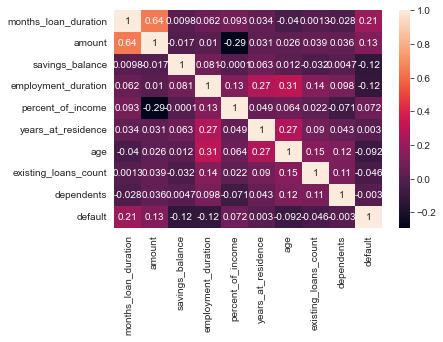

In [2507]:
sns.heatmap(corr,annot=True)

In [2508]:
mydata.dtypes

checking_balance         object
months_loan_duration    float64
credit_history           object
purpose                  object
amount                  float64
savings_balance         float64
employment_duration     float64
percent_of_income         int64
years_at_residence        int64
age                     float64
other_credit             object
housing                  object
existing_loans_count      int64
job                      object
dependents                int64
phone                    object
default                 float64
dtype: object

In [2509]:
dummies=pd.get_dummies(mydata[['checking_balance','credit_history','purpose','other_credit','housing','job','phone']],columns=['checking_balance','credit_history','purpose','other_credit','housing','job','phone'])

In [2510]:
dummies.head()

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [2511]:
mydata.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
566,< 0 DM,12.0,good,car,1372.0,50.000000,5.5,2,3,36.0,none,own,1,skilled,1,no,1.0
133,unknown,18.0,good,furniture/appliances,1984.0,50.000000,2.5,4,4,47.0,bank,other,2,skilled,1,no,0.0
317,1 - 200 DM,24.0,good,furniture/appliances,4351.0,140.391677,2.5,1,4,48.0,none,own,1,unskilled,1,yes,0.0
419,1 - 200 DM,18.0,good,car,1042.0,140.391677,2.5,4,2,33.0,none,own,1,skilled,1,no,1.0
822,< 0 DM,36.0,good,furniture/appliances,2712.0,50.000000,8.0,2,2,41.0,bank,own,1,skilled,2,no,1.0
959,1 - 200 DM,24.0,good,furniture/appliances,3069.0,275.979192,8.0,4,4,30.0,none,other,1,skilled,1,no,0.0
50,1 - 200 DM,24.0,poor,furniture/appliances,2333.0,140.391677,0.5,4,2,29.0,bank,own,1,unskilled,1,no,0.0
785,1 - 200 DM,18.0,good,business,1941.0,275.979192,2.5,4,2,35.0,none,own,1,unskilled,1,yes,0.0
280,unknown,15.0,critical,car,3368.0,275.979192,8.0,3,4,23.0,none,rent,2,skilled,1,yes,0.0
477,> 200 DM,24.0,good,furniture/appliances,5152.0,50.000000,5.5,4,2,25.0,bank,own,1,skilled,1,no,0.0


In [2512]:
columns=['checking_balance','credit_history','purpose','other_credit','housing','job','phone']
mydata=pd.concat([mydata,dummies],axis=1)
mydata.drop(columns,axis=1,inplace=True)  # drop object columns dummies

In [2513]:
mydata.dtypes   #uint8-encoding

months_loan_duration            float64
amount                          float64
savings_balance                 float64
employment_duration             float64
percent_of_income                 int64
years_at_residence                int64
age                             float64
existing_loans_count              int64
dependents                        int64
default                         float64
checking_balance_1 - 200 DM       uint8
checking_balance_< 0 DM           uint8
checking_balance_> 200 DM         uint8
checking_balance_unknown          uint8
credit_history_critical           uint8
credit_history_good               uint8
credit_history_perfect            uint8
credit_history_poor               uint8
credit_history_very good          uint8
purpose_business                  uint8
purpose_car                       uint8
purpose_car0                      uint8
purpose_education                 uint8
purpose_furniture/appliances      uint8
purpose_renovations               uint8


### Fit the model

In [2514]:
x_data=mydata.drop(['default'],axis=1)   # drop depending variable
y=mydata['default']

### Normalisation

In [2515]:
X=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [2516]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=1)

### Regression

In [2517]:
accuracies = {}

reg_model=LogisticRegression()
reg_model.fit(X_train, y_train)

LogisticRegression()

In [2518]:
lr_tr=reg_model.score(X_train, y_train)
lr_tr

0.7628571428571429

In [2519]:
acc=lr_te=reg_model.score(X_test, y_test)
accuracies['Logistic Regression'] = acc
acc

0.7333333333333333

### Polynomial Regression

In [2520]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model 
poly = PolynomialFeatures (degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2= poly.fit_transform(X_test)
poly_clf = linear_model.LogisticRegression()
poly_clf.fit(X_train2, y_train)
#y pred poly_clf.predict(x_test2)
#print(y_pred)
#In sample (training) R^2 will always improve with the number of vari 
print(poly_clf.score (X_train2, y_train))
 

0.8871428571428571


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2521]:
pD2_tr=poly_clf.score(X_train2,y_train)
pD2_tr

0.8871428571428571

In [2522]:
acc=pD2_te=poly_clf.score(X_test2,y_test)
accuracies['Poly D2'] = acc
acc

0.7433333333333333

In [2523]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [2524]:
predictions=model.predict(X_test)

In [2525]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7333333333333333

In [2526]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       214
         1.0       0.55      0.41      0.47        86

    accuracy                           0.73       300
   macro avg       0.67      0.64      0.64       300
weighted avg       0.72      0.73      0.72       300



### SVC

In [2527]:
from sklearn.svm import SVC

In [2528]:
clf=SVC(kernel='linear',C=1.6,gamma='auto')   # kernel for dimension for which good score 
clf.fit(X_train,y_train)

SVC(C=1.6, gamma='auto', kernel='linear')

In [2529]:
svc_tr=clf.score(X_train,y_train) 
svc_tr

0.77

In [2530]:
acc=svc_te=clf.score(X_test,y_test)
accuracies['SVC'] = acc
acc

0.7533333333333333

### KNN Model

In [2531]:
from sklearn.neighbors import KNeighborsClassifier

In [2532]:
knn=KNeighborsClassifier(n_neighbors=5,p=1.2)

In [2533]:
knn.fit(X_train,y_train)

KNeighborsClassifier(p=1.2)

In [2534]:
knn_tr=knn.score(X_train,y_train) 
knn_tr

0.7914285714285715

In [2535]:
acc=knn_te=knn.score(X_test,y_test) 
accuracies['KNN'] = acc
acc

0.7333333333333333

### Decision Tree Classifier

In [2536]:
from sklearn.tree import DecisionTreeClassifier

In [2537]:
dtree=DecisionTreeClassifier(max_depth=3,criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [2538]:
DTree_tr=dtree.score(X_train,y_train)
DTree_tr

0.7385714285714285

In [2539]:
acc=DTree_te=dtree.score(X_test,y_test)
accuracies['DTree'] = acc
acc

0.7433333333333333

### Bagging

In [2540]:
from sklearn.ensemble import BaggingClassifier

In [2541]:
bgg=BaggingClassifier(n_estimators=20,base_estimator=dtree,max_samples=25)

In [2542]:
bgg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3),
                  max_samples=25, n_estimators=20)

In [2543]:
bgg_tr=bgg.score(X_train,y_train)
bgg_tr

0.7571428571428571

In [2544]:
acc=bgg_te=bgg.score(X_test,y_test)
accuracies['Bagging'] = acc
acc

0.73

### Boosting

In [2545]:
from sklearn.ensemble import AdaBoostClassifier

In [2546]:
abc=AdaBoostClassifier(n_estimators=50)

In [2547]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [2548]:
bo_tr=abc.score(X_train,y_train)
bo_tr

0.8028571428571428

In [2549]:
acc=bo_te=abc.score(X_test,y_test)
accuracies['Boosting'] = acc
acc

0.75

### Gradient Boost

In [2550]:
from sklearn.ensemble import GradientBoostingClassifier

In [2551]:
gb=GradientBoostingClassifier(n_estimators=13,max_depth=4,random_state=None) 

In [2552]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=13)

In [2553]:
gb_tr=gb.score(X_train,y_train)
gb_tr

0.8114285714285714

In [2554]:
acc=gb_te=gb.score(X_test,y_test)
accuracies['Gradient Boost'] = acc
acc

0.7166666666666667

### Random Forest Gradient

In [2555]:
from sklearn.ensemble import RandomForestClassifier

In [2556]:
rfc=RandomForestClassifier( n_estimators=3,random_state=1,max_depth=7)

In [2557]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=3, random_state=1)

In [2558]:
rfg_tr=rfc.score(X_train,y_train)
rfg_tr

0.8457142857142858

In [2559]:
acc=rfg_te=rfc.score(X_test,y_test)
accuracies['Random Forest'] = acc
acc

0.7433333333333333

### Confusion Matrix

In [2560]:
y_head_lr = reg_model.predict(X_test)
y_head_pD2=poly_clf.predict(X_test2)

y_head_svc = clf.predict(X_test)
y_head_knn = knn.predict(X_test)
 
y_head_DTree = dtree.predict(X_test)
y_head_bgg = bgg.predict(X_test)
y_head_bo=abc.predict(X_test)
y_head_gb=gb.predict(X_test)
y_head_rfg=rfc.predict(X_test)


In [2561]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_pD2 = confusion_matrix(y_test,y_head_pD2)
cm_svc = confusion_matrix(y_test,y_head_svc)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_DTree = confusion_matrix(y_test,y_head_DTree)
cm_bgg = confusion_matrix(y_test,y_head_bgg)
cm_bo = confusion_matrix(y_test,y_head_bo)
cm_gb = confusion_matrix(y_test,y_head_gb)
cm_rfg = confusion_matrix(y_test,y_head_rfg)

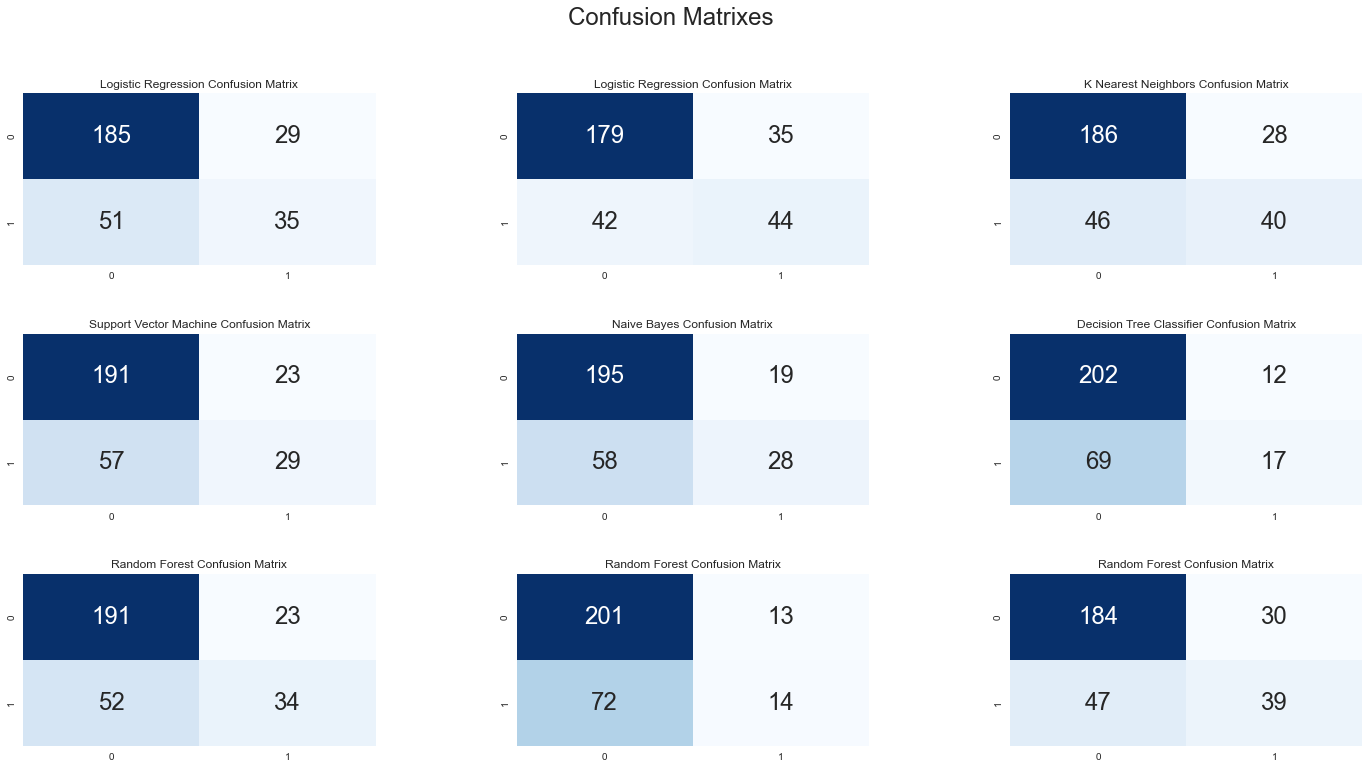

In [2562]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_pD2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_DTree,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_bgg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_bo,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_gb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,9)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rfg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()          

### Comparing Model

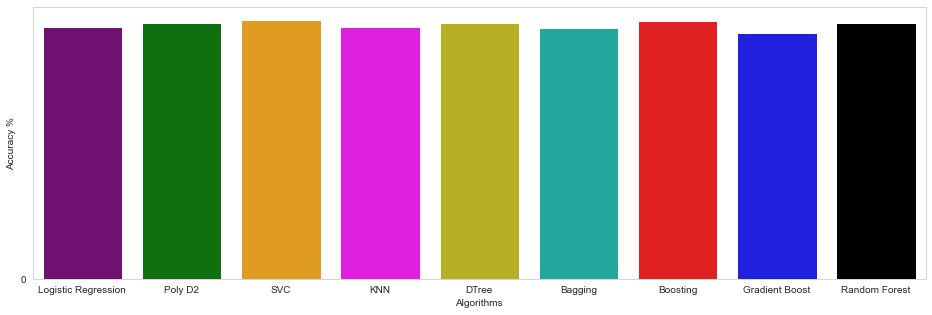

In [2563]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","r",'b','k']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [2564]:
models = ['logistic regression', 'Poly D2', 'SVC', 'KNN', 'DTree', 'Bagging', 'Boosting', 'Gradient Boost', 'Random Forest']
data = [[lr_tr, lr_te,lr_tr/lr_te],[pD2_tr,pD2_te,pD2_tr/pD2_te],[svc_tr,svc_te,svc_tr/svc_te],[knn_tr, knn_te,knn_tr/ knn_te],[DTree_tr,DTree_t,DTree_tr/DTree_t],[bgg_tr,bgg_te,bgg_tr/bgg_te],[bo_tr,bo_te,bo_tr/bo_te],[gb_tr,gb_te,gb_tr/gb_te],[rfg_tr,rfg_te,rfg_tr/rfg_te]]
cols = ["Train Score", 'Test Score','ratio'] 
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ['Test Score'])

,Train Score,Test Score,ratio
SVC,0.770000,0.753333,1.022124
Boosting,0.802857,0.750000,1.070476
Poly D2,0.887143,0.743333,1.193466
DTree,0.738571,0.743333,0.993594
Random Forest,0.845714,0.743333,1.137732
logistic regression,0.762857,0.733333,1.040260
KNN,0.791429,0.733333,1.079221
Bagging,0.757143,0.730000,1.037182
Gradient Boost,0.811429,0.716667,1.132226


### Conclusion-SVC  is the Best Model Outcome and not over and under fitting 